### ## BBM 409 - Programming Assignment 2

* You can add as many cells as you want in-between each question.
* Please add comments to your code to explain your work.  

* Please be careful about the order of runs of cells. Doing the homework, it is likely that you will be running the cells in different orders, however, they will be evaluated in the order they appear. Hence, please try running the cells in this order before submission to make sure they work.    
* Please refer to the homework text for any implementation detail. You should also carefully review the steps explained here.
* This document is also your report. Show your work.

##  Insert personal information (İrem, Saygı, 2200356103)

# 1. LOGISTIC REGRESSION TASK (40 points)

### 1. Data Loading and Exploration

##### Download the Bank Marketing dataset from https://drive.google.com/file/d/1t6QAtqfYLMhvv_XUnG4D_UsJcSwgF4an/view?usp=sharing  import other necessary libraries

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

I used loaded my dataset to colab using google.colab files.

In [120]:
from google.colab import files
uploaded = files.upload()


Saving portuguese_bank_marketing_numeric_random_subsampled.csv to portuguese_bank_marketing_numeric_random_subsampled (2).csv


I printed the head of the file to check the file loaded correctly.

In [121]:
df = pd.read_csv('portuguese_bank_marketing_numeric_random_subsampled.csv', encoding='utf-8')
print(df.head())

   age  job  marital  education  default  balance  housing  loan  contact  \
0   28  9.0        0        2.0        1     1055        1     1      1.0   
1   36  4.0        1        2.0        1      520        2     1      0.0   
2   38  2.0        0        3.0        1     1314        2     2      1.0   
3   41  9.0        1        3.0        1       28        2     1      1.0   
4   27  2.0        0        3.0        1      290        1     1      1.0   

   day_of_week  month  duration  campaign  pdays  previous  poutcome  y  
0           28      1       196         1     -1         0       0.0  1  
1           23      5       110         2     -1         0       0.0  1  
2           16      7       378         2     -1         0       0.0  1  
3            4      2       358         2     -1         0       0.0  1  
4           10      8        88         1     -1         0       0.0  1  


### 2. calculate correlation between target variable 'y' and other features (5 points)

I calculated correlations between y and the other features using corr() function, and printed them.

In [122]:
correlation_target = df.corr()['y'].drop('y')


In [123]:
# Displaying the correlations
print(correlation_target)

age            0.040038
job            0.022716
marital       -0.062501
education      0.082672
default       -0.035414
balance        0.088308
housing       -0.213409
loan          -0.118816
contact        0.219086
day_of_week   -0.042603
month          0.031213
duration       0.443087
campaign      -0.133147
pdays          0.153807
previous       0.087656
poutcome       0.291850
Name: y, dtype: float64


# 1.1 Implementing Logistic Regression with most correlated 2 features

###  Choose the two most correlated features with target feature 'y'

I took the absolute values of hte correlations using abs().
I prefered to sort the absolute values of the correlations with descending order instead of choosing them manually.
after sorting i picked the top 2 values as 2 most correated features which are duration and poutcome.
I mapped the y(target) value to (0,1) from (1,2) to use the threshold more effectively.

In [124]:
correlation_target_abs = correlation_target.abs().sort_values(ascending=False)

# Selecting the top 2 most correlated features
feature1 = correlation_target_abs.index[0]
feature2 = correlation_target_abs.index[1]


X=df[[feature1, feature2]]
y=df['y']

# When preparing the data
y = np.array([0 if label == 1 else 1 for label in y])


In [125]:
print(f"Selected features: {feature1} and {feature2}")
print(f"Their correlations with target: {correlation_target[feature1]:.3f} and {correlation_target[feature2]:.3f}")
print(y)

Selected features: duration and poutcome
Their correlations with target: 0.443 and 0.292
[0 0 0 ... 1 1 1]


###  * Define your logistic regression model as class without using any built-in libraries
### * Define necessary functions such as sigmoid, fit, predict  (10 points)

In this LogisticRegression class i defined sigmoid, fit and predict functions.

In the initialization part i gave 2 parameters, which are learning_rate(0.01) and n_iterations(1000).

learning_rate controls how much the model updates its parameters (weights and bias) during training.
n_iterations defines how many times the model will update its parameters by iterating over the training data.

The sigmoid function maps any real number 𝑧 to a value between 0 and 1.
The purpose of the sigmoid function is making the target values suitable for binary classification tasks.

The fit function is responsible for training the model using Gradient Descent.
It returns 2 values, weight and bias.
This function applies gradient descent in the numbr of n_iterations.
At each iteration, the weights and bias become slightly more tuned to the data.

The predict function is used for new data.
It makes predictions on the new data.

First, it makes a raw linear prediction using current weights and bias.

Then, applies the sigmoid function to get probabilities for each data point.

After all, converts probabilities into class labels:
  

*   If the probability is greater than 0.5, classify it as class 1.
*   Otherwise, classify it as class 0.


  



In [126]:
class LogisticRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):

        return 1 / (1 + np.exp(-z))

    def fit(self, X, y): # Trains the logistic regression model

        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0



        # Gradient descent
        for _ in range(self.n_iterations):
            # Forward pass
            linear_pred = np.dot(X, self.weights) + self.bias
            predictions = self.sigmoid(linear_pred)

            # Computing gradients
            dw = (1/n_samples) * np.dot(X.T, (predictions - y))
            db = (1/n_samples) * np.sum(predictions - y)

            # Updating parameters
            self.weights = self.weights - self.learning_rate * dw
            self.bias = self.bias - self.learning_rate * db
            print("Weights:", self.weights)
            print("Bias:", self.bias)
            print('----')

        return self.weights, self.bias

    def predict(self, X): #Makes predictions for input X

        linear_pred = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(linear_pred)
        print("ypred", y_pred)
        return [1 if i > 0.5 else 0 for i in y_pred]

    def predict_proba(self, X):

        linear_pred = np.dot(X, self.weights) + self.bias
        return self.sigmoid(linear_pred)

Split the dataset into a training set and a validation set (80% training and 20% validation).

I splitted the sataset using sklearn.model_selection train_test_split.
We are doing this because ve need a validation set too not just a training set.

In [127]:
X_train, X_val, y_train, y_val = train_test_split(X, y,
                                                 test_size=0.2,    # 20% for validation
                                                 train_size=0.8,   # 80% for training
                                                 random_state=42)  # for reproducibility

In [128]:
print("Training set shapes:")
print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print("\nValidation set shapes:")
print(f"X_val: {X_val.shape}")
print(f"y_val: {y_val.shape}")

Training set shapes:
X_train: (8462, 2)
y_train: (8462,)

Validation set shapes:
X_val: (2116, 2)
y_val: (2116,)


Scale the features using StandardScaler

I defined a standardize function to scale.
We need Standardization, because:


*   Standardization puts all features on the same scale.
*   For models using gradient descent, standardization helps the algorithm converge faster by ensuring that weights are updated uniformly across features.
*   Models like SVM and Logistic Regression perform better when features are on a similar scale, as their loss functions and optimization depend on consistent scaling.

This function first calculates mean and standard deviation using mean() and std() functions.

After, subtracts the mean from each feature value and divide by the standard deviation, and we get the scaled values.

At the end, it convert the data back to DataFrame.



In [129]:
def standardize(X_train, X_val): #Standardize features by removing the mean and scaling to unit variance

    # Calculating mean and standard deviation from training data
    mean = np.mean(X_train, axis=0)
    std = np.std(X_train, axis=0)

    # Scaling training data
    X_train_scaled = (X_train - mean) / std

    # Scaling validation data using training parameters
    X_val_scaled = (X_val - mean) / std

    # Converting to DataFrame to maintain feature names
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
    X_val_scaled = pd.DataFrame(X_val_scaled, columns=X_val.columns)

    return X_train_scaled, X_val_scaled, mean, std

X_train_scaled, X_val_scaled, mean, std = standardize(X_train, X_val)

# Verifing scaling
print("\nTraining set statistics:")
print("Mean:\n", X_train_scaled.mean().round(2))
print("\nStandard deviation:\n", X_train_scaled.std().round(2))

print("\nValidation set statistics:")
print("Mean:\n", X_val_scaled.mean().round(2))
print("\nStandard deviation:\n", X_val_scaled.std().round(2))


Training set statistics:
Mean:
 duration    0.0
poutcome    0.0
dtype: float64

Standard deviation:
 duration    1.0
poutcome    1.0
dtype: float64

Validation set statistics:
Mean:
 duration    0.02
poutcome   -0.03
dtype: float64

Standard deviation:
 duration    1.03
poutcome    0.99
dtype: float64


* Initialize and train the custom logistic regression model

I trained the model here using the LogisticRegression class above with parameters X_train_scaled(standardized x) and y_train.

And i printed the weights and bias.

In [130]:
# Initializing the model with specified parameters
model = LogisticRegression(learning_rate=0.01, n_iterations=1000)

# Training the model using the scaled training data
weights, bias = model.fit(X_train_scaled, y_train)

Weights: [0.00223499 0.00145824]
Bias: 4.017962656582368e-05
----
Weights: [0.00446455 0.0029131 ]
Bias: 8.025880938281044e-05
----
Weights: [0.00668871 0.00436457]
Bias: 0.00012023783130971053
----
Weights: [0.00890748 0.00581267]
Bias: 0.00016011700581527042
----
Weights: [0.01112086 0.0072574 ]
Bias: 0.00019989667642436487
----
Weights: [0.01332888 0.00869877]
Bias: 0.00023957721615952657
----
Weights: [0.01553155 0.0101368 ]
Bias: 0.00027915902697833907
----
Weights: [0.01772888 0.01157148]
Bias: 0.0003186425392071664
----
Weights: [0.01992088 0.01300283]
Bias: 0.00035802821097169577
----
Weights: [0.02210757 0.01443085]
Bias: 0.0003973165276247746
----
Weights: [0.02428897 0.01585556]
Bias: 0.000436508001172023
----
Weights: [0.02646509 0.01727695]
Bias: 0.0004756031696957041
----
Weights: [0.02863594 0.01869504]
Bias: 0.0005146025967773323
----
Weights: [0.03080154 0.02010984]
Bias: 0.0005535068709194954
----
Weights: [0.0329619  0.02152135]
Bias: 0.0005923166049673649
----
Weigh

* Make predictions on the validation set

Here, i am making predictions with train data and validation data.

In [131]:
# Making predictions on both training and validation sets
y_train_pred = model.predict(X_train_scaled)
y_val_pred = model.predict(X_val_scaled)

# Getting probability predictions
y_train_prob = model.predict_proba(X_train_scaled)
y_val_prob = model.predict_proba(X_val_scaled)

# Printing initial results
print("Training set predictions shape:", len(y_train_pred))
print("Validation set predictions shape:", len(y_val_pred))

# checking sample predictions
print("\nSample predictions (first 5):")
print("Training predictions:", y_train_pred)
print("validation predictions", y_val_pred)
print("Training probabilities:", y_train_prob)


ypred [0.57008043 0.39811512 0.21259416 ... 0.74889211 0.46386144 0.80859306]
ypred [0.92451615 0.58907054 0.75611824 ... 0.24770523 0.87551562 0.24988718]
Training set predictions shape: 8462
Validation set predictions shape: 2116

Sample predictions (first 5):
Training predictions: [1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 

### Evaluate the model's performance, print classification report and confusion matrix  (5 points)

I used sklearn.metrics to print classification report and confusion matrix.

Confusion matrix includes TP, FP, FN, TN.
You can see the classification report an dconfusion matrix below.


Training set evaluation:

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.84      0.78      4197
           1       0.81      0.68      0.74      4265

    accuracy                           0.76      8462
   macro avg       0.77      0.76      0.76      8462
weighted avg       0.77      0.76      0.76      8462



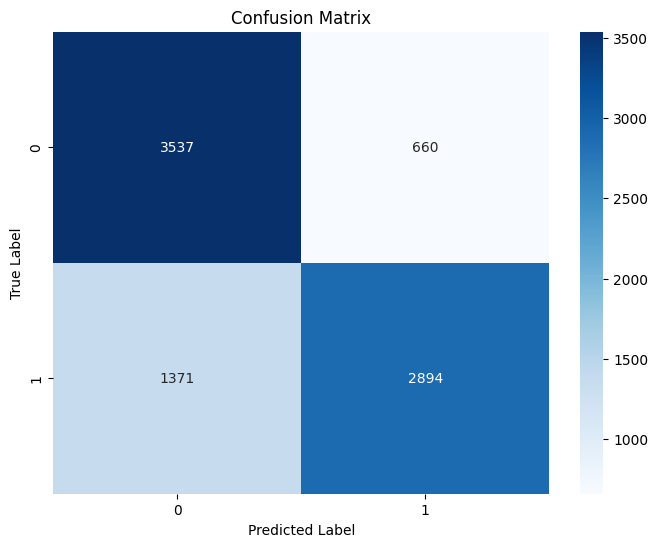

In [132]:
from sklearn.metrics import classification_report, confusion_matrix
def evaluate_model(y_true, y_pred):

    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()


# Evaluating the model on the training set
print("Training set evaluation:")
evaluate_model(y_train, y_train_pred)

### Print decision boundaries as in PA1 (5 points)

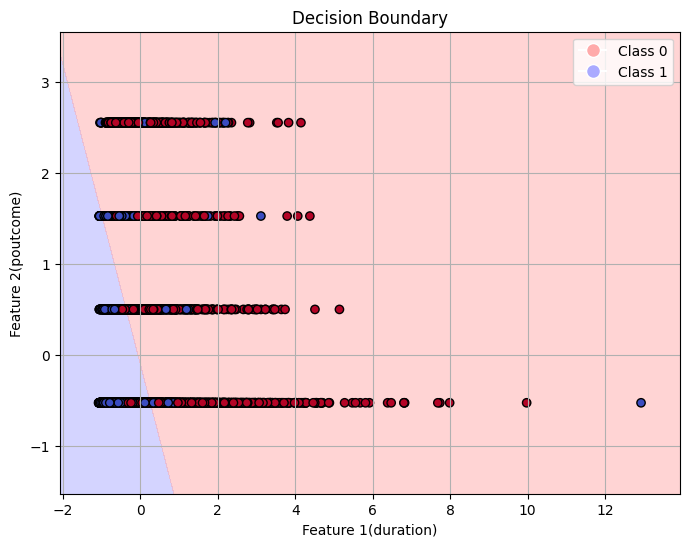

In [133]:
import matplotlib.pyplot as plt
# Function to plot the decision boundary
def plot_decision_boundary(X, y, model):

  # Unpacking the model parameters
    weights, bias = model

    # Creating a meshgrid for the plot background
    x_min, x_max = X.values[:, 0].min() - 1, X.values[:, 0].max() + 1
    y_min, y_max = X.values[:, 1].min() - 1, X.values[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))

    # Calculating the decision boundary
    Z = np.dot(np.c_[xx.ravel(), yy.ravel()], weights) + bias
    Z = Z.reshape(xx.shape)

    # Creating the plot
    plt.figure(figsize=(8, 6))

    # Plotting the decision boundary by contouring the decision function output
    plt.contourf(xx, yy, Z, levels=[-np.inf, 0, np.inf], colors=['#AAAAFF','#FFAAAA'], alpha=0.5)

    # Plotting the actual data points
    plt.scatter(X.values[:, 0], X.values[:, 1], c=y, cmap='coolwarm', edgecolors='k', marker='o')

    feature_names = X_train.columns.tolist()

    # Adding labels, title, and legend
    plt.xlim([x_min, x_max])
    plt.ylim([y_min, y_max])
    plt.xlabel('Feature 1('+ feature_names[0] + ')')
    plt.ylabel('Feature 2(' + feature_names[1] + ')')
    plt.title('Decision Boundary')

    # Legend for the classes
    plt.legend(handles=[
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#FFAAAA', label='Class 0', markersize=10),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#AAAAFF', label='Class 1', markersize=10)
    ])
    plt.grid(True)
    plt.show()


model = (weights, bias)


plot_decision_boundary(X_train_scaled, y_train, model)
# Plotting the decision boundary using the selected features and trained model

# 1.2 Implementing Logistic Regression using all features.

* Redefine input and target variables. In this experiment, you will use all input features in the dataset.

Instead of choosing features i used all of the features.

In [134]:
X = df.drop(columns=['y'])  # 'y' is the target column

# Defining target variable
y = df['y']

y = np.array([0 if label == 1 else 1 for label in y])

* Split the dataset into a training set and a validation set (80% training and 20% validation).

Splitted the data nto validation and train sets.


In [135]:
X_train, X_val, y_train, y_val = train_test_split(X, y,
                                                 test_size=0.2,    # 20% for validation
                                                 train_size=0.8,   # 80% for training
                                                 random_state=42)  # for reproducibility


print("Training set shapes:")
print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print("\nValidation set shapes:")
print(f"X_val: {X_val.shape}")
print(f"y_val: {y_val.shape}")

Training set shapes:
X_train: (8462, 16)
y_train: (8462,)

Validation set shapes:
X_val: (2116, 16)
y_val: (2116,)


* Scale the features using StandardScaler

Using the standardize() function, scaled the x_train and x_validation sets.

In [136]:
X_train_scaled, X_val_scaled, mean, std = standardize(X_train, X_val)

# Verifing scaling
print("\nTraining set statistics:")
print("Mean:\n", X_train_scaled.mean().round(2))
print("\nStandard deviation:\n", X_train_scaled.std().round(2))

print("\nValidation set statistics:")
print("Mean:\n", X_val_scaled.mean().round(2))
print("\nStandard deviation:\n", X_val_scaled.std().round(2))


Training set statistics:
Mean:
 age            0.0
job           -0.0
marital       -0.0
education     -0.0
default       -0.0
balance        0.0
housing       -0.0
loan           0.0
contact        0.0
day_of_week    0.0
month         -0.0
duration       0.0
campaign      -0.0
pdays         -0.0
previous      -0.0
poutcome       0.0
dtype: float64

Standard deviation:
 age            1.0
job            1.0
marital        1.0
education      1.0
default        1.0
balance        1.0
housing        1.0
loan           1.0
contact        1.0
day_of_week    1.0
month          1.0
duration       1.0
campaign       1.0
pdays          1.0
previous       1.0
poutcome       1.0
dtype: float64

Validation set statistics:
Mean:
 age            0.03
job           -0.02
marital        0.04
education      0.00
default       -0.01
balance       -0.04
housing        0.01
loan           0.01
contact       -0.04
day_of_week   -0.00
month          0.02
duration       0.02
campaign       0.01
pdays       

### Initialize and train the custom logistic regression model.

Training the model on the scaled training sets and printing the weights and bias.

In [137]:
# Initializing the model with parameters
model = LogisticRegression(learning_rate=0.01, n_iterations=1000)

# Training the model using the scaled training data
weights, bias = model.fit(X_train_scaled, y_train)

Görüntülenen çıkış son 5000 satıra kısaltıldı.
 -0.00537007  0.00617541  0.00312275  0.01148786]
Bias: 0.0003186434065792519
----
Weights: [ 0.00153432  0.00081287 -0.0029829   0.00408018 -0.00197668  0.0038359
 -0.00902194 -0.00547101  0.00975833 -0.00200216  0.00089295  0.01992438
 -0.00602853  0.00692456  0.00349894  0.01289562]
Bias: 0.00035802962024993377
----
Weights: [ 0.00169924  0.00090217 -0.00330868  0.00452478 -0.00219007  0.00425135
 -0.01000659 -0.00606625  0.01081844 -0.00221925  0.00098773  0.02211194
 -0.0066842   0.00766874  0.00387205  0.01429722]
Bias: 0.00039731869143163354
----
Weights: [ 0.00186306  0.00099126 -0.00363333  0.00496766 -0.00240223  0.00466468
 -0.01098774 -0.00665899  0.01187381 -0.00243528  0.00108163  0.0242943
 -0.00733708  0.00840798  0.0042421   0.01569268]
Bias: 0.00043651117670889437
----
Weights: [ 0.0020258   0.00108016 -0.00395687  0.00540883 -0.00261317  0.00507591
 -0.01196539 -0.00724926  0.01292445 -0.00265027  0.00117468  0.02647146


* Make predictions on the validation set

Making predictions on training and validation datasets.

In [138]:
# Making predictions on both training and validation sets
y_train_pred = model.predict(X_train_scaled)
y_val_pred = model.predict(X_val_scaled)

# Getting probability predictions
y_train_prob = model.predict_proba(X_train_scaled)
y_val_prob = model.predict_proba(X_val_scaled)

# Printing initial results
print("Training set predictions shape:", len(y_train_pred))
print("Validation set predictions shape:", len(y_val_pred))

# checking sample predictions
print("\nSample predictions (first 5):")
print("Training predictions:", y_train_pred)
print("validation predictions", y_val_pred)
print("Training probabilities:", y_train_prob)


ypred [0.71879451 0.55645544 0.42016826 ... 0.553045   0.37662239 0.78737345]
ypred [0.78073039 0.57167942 0.82681848 ... 0.10028786 0.89314994 0.20340784]
Training set predictions shape: 8462
Validation set predictions shape: 2116

Sample predictions (first 5):
Training predictions: [1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 

### Evaluate the model's performance, print classification report and confusion matrix  (5 points)

Training set evaluation:

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.82      0.80      4197
           1       0.82      0.77      0.79      4265

    accuracy                           0.80      8462
   macro avg       0.80      0.80      0.80      8462
weighted avg       0.80      0.80      0.80      8462



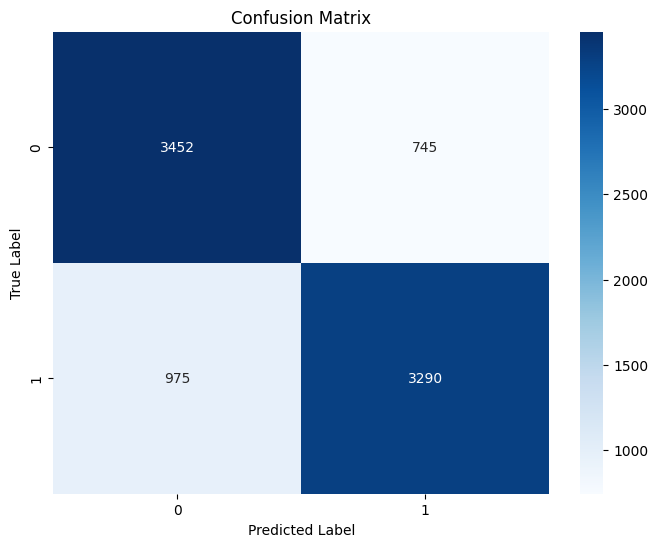

In [139]:
print("Training set evaluation:")
evaluate_model(y_train, y_train_pred)

### Print decision boundaries as in PA1. Briefly explain the impact of the number of features on the learning ability of the model. (5 points)


*   Using All Features (Accuracy: 0.80):

When the model uses all the features, it has access to more information, which can help it learn better patterns and relationships. However, not all features are equally important—some might just add noise or unnecessary complexity, which can make the model overfit. Overfitting is when the model does great on the training data but struggles with new, unseen data.


*   Using Only the 2 Most Correlated Features (Accuracy: 0.76):

By focusing on just the 2 most correlated features, we simplify the model. This makes it faster to train and reduces the chance of overfitting since we’ve removed the less relevant features. However, in doing so, we might lose some useful information, which is why the accuracy drops a bit.


### After completing the SVM and logistic regression tasks, the best results of the experiments with the SVM and Logistic regression models will be compared in a table. (5 points)

With 2 most correlated features Logistic Regression has more accuracy than SVM but with all features SVM is mor succesful.
You can see the accurasies below:

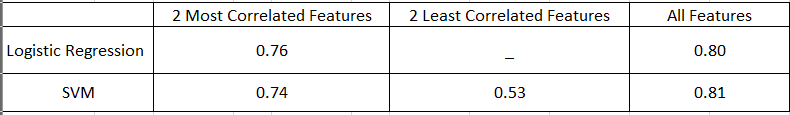

# 2. Support Vector Machine Task  (30 points)

* Define your SVM model using sklearn

## 2.1 implementing svm with grid search cv using all features (10 points)

* Define features and target variable, you will use all features of dataset in this task

Defining the target and feature values.
And mapping the y values to 1 and 0.

In [140]:
X_svm = df.drop(columns=['y'])  # 'y' is the target column

# Defining target variable
y_svm = df['y']

y_svm = np.array([0 if label == 1 else 1 for label in y_svm])

* Split the dataset into a training set and a validation set (80% training and 20% validation).

Splitting the dataset into training and validation subsets.

In [141]:
X_svm_train, X_svm_val, y_svm_train, y_svm_val = train_test_split(X_svm, y_svm,
                                                 test_size=0.2,    # 20% for validation
                                                 train_size=0.8,   # 80% for training
                                                 random_state=42)  # for reproducibility


print("Training set shapes:")
print(f"X_train: {X_svm_train.shape}")
print(f"y_train: {y_svm_train.shape}")
print("\nValidation set shapes:")
print(f"X_val: {X_svm_val.shape}")
print(f"y_val: {y_svm_val.shape}")

Training set shapes:
X_train: (8462, 16)
y_train: (8462,)

Validation set shapes:
X_val: (2116, 16)
y_val: (2116,)


* Scale the features using StandardScaler

Scaling the features using standardize() function.

In [142]:
X_svm_train_scaled, X_svm_val_scaled, mean, std = standardize(X_svm_train, X_svm_val)

# Verifing scaling
print("\nTraining set statistics:")
print("Mean:\n", X_svm_train_scaled.mean())
print("\nStandard deviation:\n", X_svm_train_scaled.std())

print("\nValidation set statistics:")
print("Mean:\n", X_svm_val_scaled.mean())
print("\nStandard deviation:\n", X_svm_val_scaled.std())


Training set statistics:
Mean:
 age            1.196553e-16
job           -1.595404e-17
marital       -8.102975e-17
education     -3.159321e-16
default       -7.504698e-16
balance        1.270026e-17
housing       -1.830517e-16
loan           2.456083e-17
contact        1.322506e-16
day_of_week    5.164072e-17
month         -1.146172e-16
duration       7.305273e-17
campaign      -1.679373e-17
pdays         -1.847310e-17
previous      -2.046736e-17
poutcome       3.358746e-17
dtype: float64

Standard deviation:
 age            1.000059
job            1.000059
marital        1.000059
education      1.000059
default        1.000059
balance        1.000059
housing        1.000059
loan           1.000059
contact        1.000059
day_of_week    1.000059
month          1.000059
duration       1.000059
campaign       1.000059
pdays          1.000059
previous       1.000059
poutcome       1.000059
dtype: float64

Validation set statistics:
Mean:
 age            0.028342
job           -0.015718


#### Implement GridSearchCV  (5 points)

Defining the parameters for grid.

C is the regularization parameter.This controls how much the model tries to avoid misclassifying training examples.

Small C: The model allows some misclassifications to focus on simplicity and generalization (better for noisy data).

Large C: The model tries to classify every point correctly, even if it overfits the data.

Gamma is kernel coefficient. This affects how much influence a single data point has.

Kernel is kernel type. Determines the type of decision boundary the model creates.

'linear': A straight line (or hyperplane in higher dimensions).

'poly': A polynomial curve, useful for more complex relationships.

I didn't use more parameters because when i do that the code runs so long. And the accuracy would be more than i get if i used more parameters.

In [143]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Defining the parameter grid to search
param_grid = {
    'C': [1,10],           # Regularization parameter
    'gamma': ['scale', 'auto'],  # Kernel coefficient for 'rbf', 'poly' kernels
    'kernel': ['linear','poly']  # Kernel types
}




* Initialize the SVM classifier

In [144]:
# Creating an SVM model
svm = SVC()

* Train the SVM classifier with the best parameters found from grid search


Performing the GridSearchCV with the parameters above and printing the best parameters we get and the best accuracy.

Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}

Best Cross-Validation Score: 0.8170648435569072

In [145]:
# Performing GridSearchCV
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, scoring='accuracy', cv=5, verbose=2)
grid_search.fit(X_svm_train_scaled, y_svm_train)

# Printing the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END ....................C=1, gamma=scale, kernel=linear; total time=   2.6s
[CV] END ....................C=1, gamma=scale, kernel=linear; total time=   3.7s
[CV] END ....................C=1, gamma=scale, kernel=linear; total time=   2.7s
[CV] END ....................C=1, gamma=scale, kernel=linear; total time=   2.4s
[CV] END ....................C=1, gamma=scale, kernel=linear; total time=   2.7s
[CV] END ......................C=1, gamma=scale, kernel=poly; total time=   1.6s
[CV] END ......................C=1, gamma=scale, kernel=poly; total time=   2.0s
[CV] END ......................C=1, gamma=scale, kernel=poly; total time=   2.5s
[CV] END ......................C=1, gamma=scale, kernel=poly; total time=   1.4s
[CV] END ......................C=1, gamma=scale, kernel=poly; total time=   1.6s
[CV] END .....................C=1, gamma=auto, kernel=linear; total time=   2.5s
[CV] END .....................C=1, gamma=auto, ke

* Make predictions on the validation set using the best model


Making predictions with the best model we get from GridSearchCV on validation set.

In [146]:
# Evaluating the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_svm_val_scaled)
print(y_pred)

[1 1 1 ... 0 1 0]


#### Evaluate the model's performance, print classification report and confusion matrix and best parameters found from GridSearchCV  (5 points)

The accuracy of the GridSearchCV:0.81.

Classification Report:

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.80      0.82      1092
           1       0.80      0.82      0.81      1024

    accuracy                           0.81      2116
   macro avg       0.81      0.81      0.81      2116
weighted avg       0.81      0.81      0.81      2116



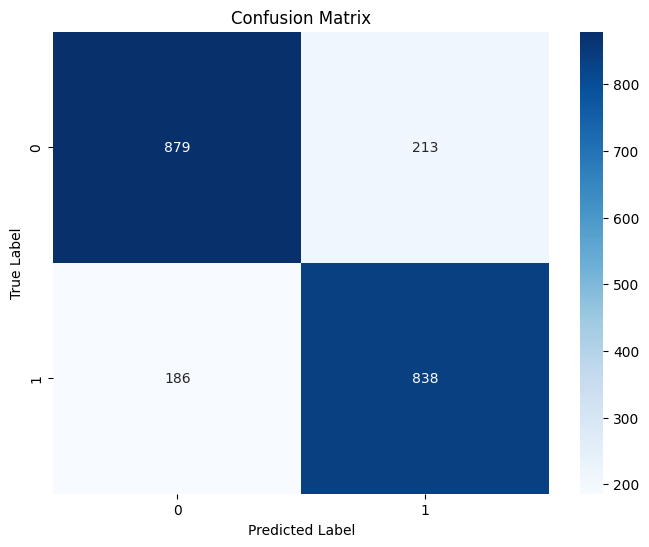

In [147]:
# Printing classification report
print("Classification Report:")


evaluate_model(y_svm_val, y_pred)

## 2.2 implementing svm with most correlated 2 features (10 points)

#### Choose the two most correlated features with target feature 'y'

Choosing the most correlated features using corr() function.
And defining them as the features of X.

In [148]:
correlation_target_abs = correlation_target.abs().sort_values(ascending=False)

# Selecting the top 2 most correlated features
feature1 = correlation_target_abs.index[0]
feature2 = correlation_target_abs.index[1]


X_correlated_svm =df[[feature1, feature2]]
y_correlated_svm =df['y']

# preparing the data
y_correlated_svm = np.array([0 if label == 1 else 1 for label in y_correlated_svm])

In [149]:
print(f"Selected features: {feature1} and {feature2}")
print(f"Their correlations with target: {correlation_target[feature1]:.3f} and {correlation_target[feature2]:.3f}")
print(y_correlated_svm)

Selected features: duration and poutcome
Their correlations with target: 0.443 and 0.292
[0 0 0 ... 1 1 1]


* Split the dataset into a training set and a validation set (80% training and 20% validation).

Splitting the dataset into train and validation sets.

In [150]:
X_correlatedsvm_train, X_correlatedsvm_val, y_correlatedsvm_train, y_correlatedsvm_val = train_test_split(X_correlated_svm, y_correlated_svm,
                                                 test_size=0.2,    # 20% for validation
                                                 train_size=0.8,   # 80% for training
                                                 random_state=42)  # for reproducibility

In [151]:
print("Training set shapes:")
print(f"X_train: {X_correlatedsvm_train.shape}")
print(f"y_train: {y_correlatedsvm_train.shape}")
print("\nValidation set shapes:")
print(f"X_val: {X_correlatedsvm_val.shape}")
print(f"y_val: {y_correlatedsvm_val.shape}")

Training set shapes:
X_train: (8462, 2)
y_train: (8462,)

Validation set shapes:
X_val: (2116, 2)
y_val: (2116,)


* Scale the features using StandardScaler

Standardizing the training and validation sets of X.

In [152]:
X_correlatedsvm_train_scaled, X_correlatedsvm_val_scaled, mean, std = standardize(X_correlatedsvm_train, X_correlatedsvm_val)

# Verifing scaling
print("\nTraining set statistics:")
print("Mean:\n", X_correlatedsvm_train_scaled.mean())
print("\nStandard deviation:\n", X_correlatedsvm_train_scaled.std())

print("\nValidation set statistics:")
print("Mean:\n", X_correlatedsvm_val_scaled.mean())
print("\nStandard deviation:\n", X_correlatedsvm_val_scaled.std())


Training set statistics:
Mean:
 duration    7.305273e-17
poutcome    3.358746e-17
dtype: float64

Standard deviation:
 duration    1.000059
poutcome    1.000059
dtype: float64

Validation set statistics:
Mean:
 duration    0.018285
poutcome   -0.031426
dtype: float64

Standard deviation:
 duration    1.026635
poutcome    0.987570
dtype: float64


*  Initialize the SVM classifier, assign 'C' and 'kernel' parameters from the best hyperparameters you found from GridSearchCV

Getting the best parameters of the GridSearchCV and initializing the SVM classifier with those parameters.

In [153]:
best_C = grid_search.best_params_['C']
best_gamma = grid_search.best_params_['gamma']
best_kernel = grid_search.best_params_['kernel']

final_svm = SVC(C=best_C, gamma = best_gamma, kernel=best_kernel)

* Train the SVM classifier

In [154]:
final_svm.fit(X_correlatedsvm_train_scaled, y_correlatedsvm_train)

SVC(C=10, kernel='poly')

* Make predictions on the validation set

In [155]:
y_pred = final_svm.predict(X_correlatedsvm_val_scaled)

#### Evaluate the model's performance, print classification report and confusion matrix  (5 points)

Classification Report:

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.89      0.78      1092
           1       0.83      0.59      0.69      1024

    accuracy                           0.74      2116
   macro avg       0.76      0.74      0.73      2116
weighted avg       0.76      0.74      0.73      2116



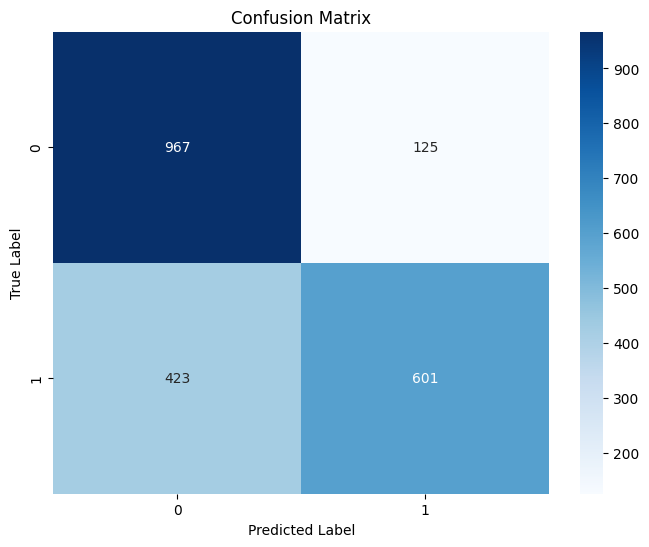

In [156]:
# Printing classification report
print("Classification Report:")

evaluate_model(y_correlatedsvm_val, y_pred)

##### Visualize decision boundary and support vectors (5 points)

With the parameters C, Gamma and Kernel the accuracy and the shape of the decision boundary would change.
Since we used the best parameters and most correlated features the accuracy is high. But the number of the supports vectors high too, i think this is beacuse of the values of C, Gamma and Kernel.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


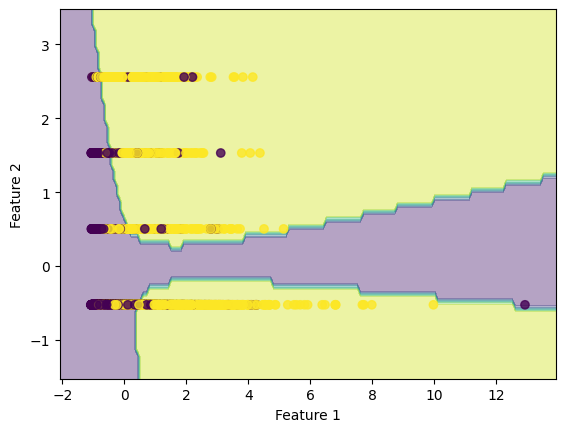

In [157]:
def plot_decision_boundary_nonlinear(X, y, model):
    # Mesh grid
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                        np.arange(y_min, y_max, 0.1))

    # making predictions
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plotting
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, alpha=0.8)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# calling the function
plot_decision_boundary_nonlinear(X_correlatedsvm_train_scaled, y_correlatedsvm_train, final_svm)

Number of support vectors: 5411
Support vector indices: [   1    3    4 ... 8452 8457 8459]


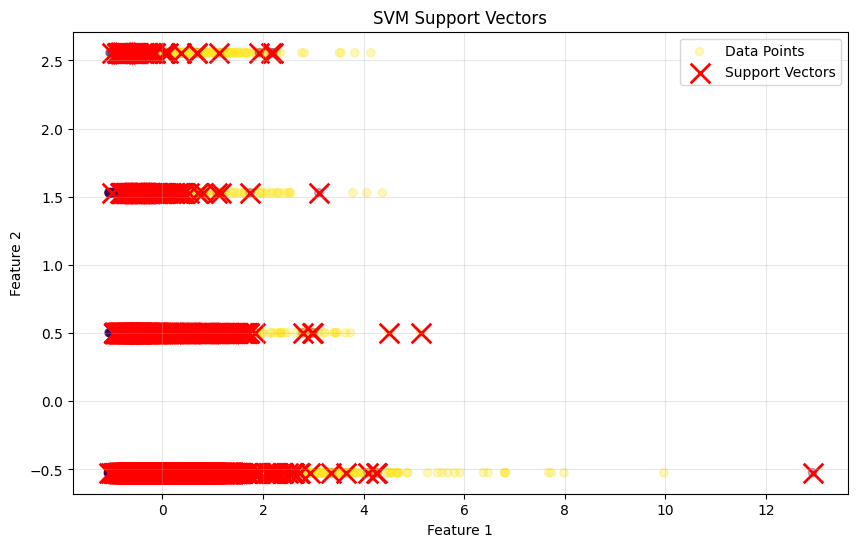

In [158]:
import numpy as np
import matplotlib.pyplot as plt

def plot_support_vectors(model, X, y, title='SVM Support Vectors'):
    """
    Plot only support vectors and data points
    """
    plt.figure(figsize=(10, 6))

    # Plotting all data points with low alpha
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.3, label='Data Points')

    # Getting and plotting support vectors
    support_vectors = model.support_vectors_
    support_vector_indices = model.support_
    support_vector_labels = y[support_vector_indices]

    # Plotting support vectors with distinct style
    plt.scatter(support_vectors[:, 0], support_vectors[:, 1],
               c='red', marker='x', s=200, linewidths=2,
               label='Support Vectors')

    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Printing number of support vectors
    print(f"Number of support vectors: {len(support_vectors)}")
    # Printing support vector indices
    print(f"Support vector indices: {support_vector_indices}")

    plt.show()



# plot support vectors
X_correlatedsvm_train_scaled_np = X_correlatedsvm_train_scaled.values


plot_support_vectors(final_svm, X_correlatedsvm_train_scaled_np, y_correlatedsvm_train)

## 2.3 implementing svm with least correlated 2 features (10 points)

#### Choose the two least correlated features with target feature 'y'

Choosing the least correlated features. Which are job and month.

In [159]:
correlation_matrix = df.corr()

# Getting the correlation of features with the target variable 'y'
correlation_target = correlation_matrix['y']

# Getting the absolute correlation values and sorting them in ascending order
correlation_target_abs = correlation_target.abs().sort_values(ascending=True)

# Selecting the top 2 least correlated features
feature1 = correlation_target_abs.index[0]
feature2 = correlation_target_abs.index[1]

# Creating the new dataset with the least correlated features
X_least_correlated_svm = df[[feature1, feature2]]
y_least_correlated_svm = df['y']

# Printing the selected features
print(f"The two least correlated features with target 'y': {feature1}, {feature2}")

The two least correlated features with target 'y': job, month


* Split the dataset into a training set and a validation set (80% training and 20% validation).

Splitting the dataset into validation and training sets.

In [160]:
X_least_correlated_svm_train, X_least_correlated_svm_val, y_least_correlated_svm_train, y_least_correlated_svm_val = train_test_split(X_least_correlated_svm, y_least_correlated_svm,
                                                 test_size=0.2,    # 20% for validation
                                                 train_size=0.8,   # 80% for training
                                                 random_state=42)  # for reproducibility

In [161]:
print("Training set shapes:")
print(f"X_train: {X_least_correlated_svm_train.shape}")
print(f"y_train: {y_least_correlated_svm_train.shape}")
print("\nValidation set shapes:")
print(f"X_val: {X_least_correlated_svm_val.shape}")
print(f"y_val: {y_least_correlated_svm_val.shape}")

Training set shapes:
X_train: (8462, 2)
y_train: (8462,)

Validation set shapes:
X_val: (2116, 2)
y_val: (2116,)


* Scale the features using StandardScaler

Standardizing the training and validation sets of the X.

In [162]:
X_least_correlated_svm_train_scaled, X_least_correlated_svm_val_scaled, mean, std = standardize(X_least_correlated_svm_train, X_least_correlated_svm_val)

# Verifing scaling
print("\nTraining set statistics:")
print("Mean:\n", X_least_correlated_svm_train_scaled.mean())
print("\nStandard deviation:\n", X_least_correlated_svm_train_scaled.std())

print("\nValidation set statistics:")
print("Mean:\n", X_least_correlated_svm_val_scaled.mean())
print("\nStandard deviation:\n", X_least_correlated_svm_val_scaled.std())


Training set statistics:
Mean:
 job     -1.595404e-17
month   -1.146172e-16
dtype: float64

Standard deviation:
 job      1.000059
month    1.000059
dtype: float64

Validation set statistics:
Mean:
 job     -0.015718
month    0.016413
dtype: float64

Standard deviation:
 job      0.980476
month    0.996395
dtype: float64


*  Initialize the SVM classifier, assign 'C' and 'kernel' parameters from the best hyperparameters you found from GridSearchCV

Getting the best params of GridSearchCV.

In [163]:
best_C = grid_search.best_params_['C']
best_gamma = grid_search.best_params_['gamma']
best_kernel = grid_search.best_params_['kernel']

final_svm = SVC(C=best_C, gamma = best_gamma, kernel=best_kernel)

* Train the SVM classifier

In [164]:
final_svm.fit(X_least_correlated_svm_train_scaled, y_least_correlated_svm_train)

SVC(C=10, kernel='poly')

* Make predictions on the validation set

In [165]:
y_pred = final_svm.predict(X_least_correlated_svm_val_scaled)

#### Evaluate the model's performance, print classification report and confusion matrix  (5 points)

Since we used the least correlated features and small parameters in GridSearchCV the accuracy is low.

Accuracy is 0.53

Classification Report:

Classification Report:
              precision    recall  f1-score   support

           1       0.53      0.86      0.65      1092
           2       0.55      0.19      0.28      1024

    accuracy                           0.53      2116
   macro avg       0.54      0.52      0.47      2116
weighted avg       0.54      0.53      0.47      2116



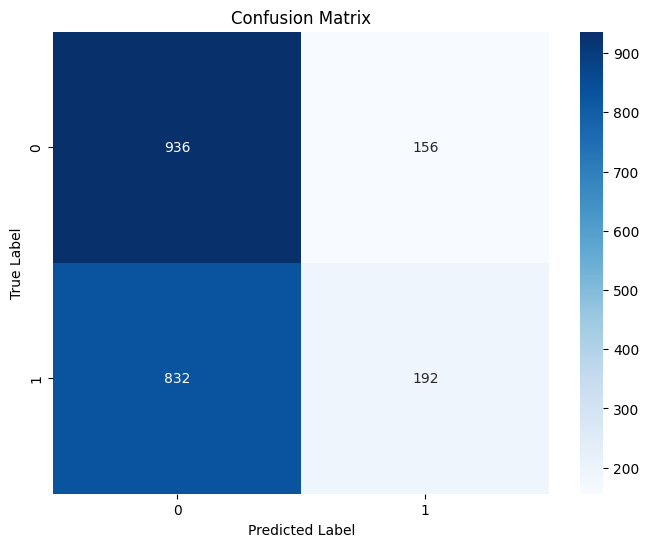

In [166]:
# Printing classification report
print("Classification Report:")

evaluate_model(y_least_correlated_svm_val, y_pred)

##### Visualize decision boundary and support vectors(5 points)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


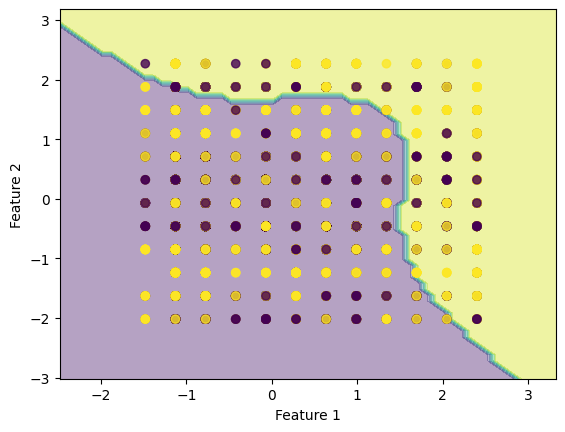

In [167]:
plot_decision_boundary_nonlinear(X_least_correlated_svm_train_scaled, y_least_correlated_svm_train, final_svm)

Number of support vectors: 8304
Support vector indices: [   1    2    3 ... 8457 8459 8461]


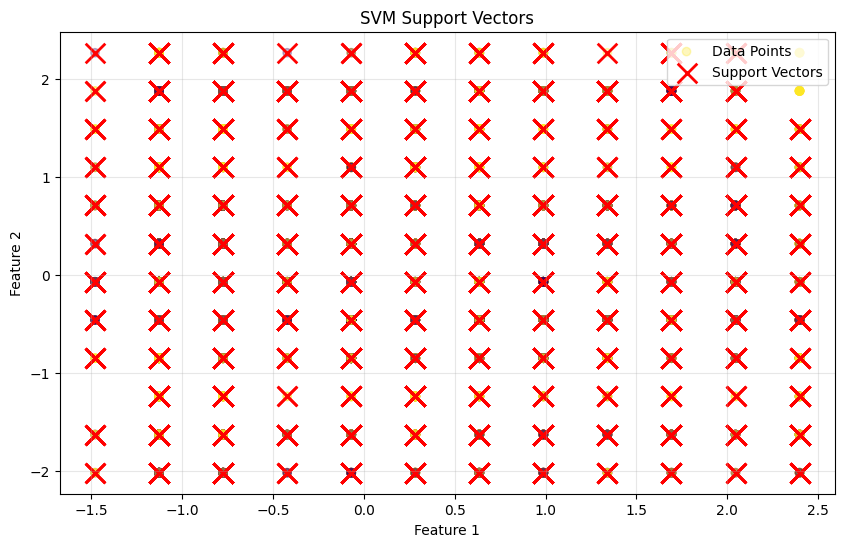

In [168]:
import numpy as np
import matplotlib.pyplot as plt

def plot_support_vectors(model, X, y, title='SVM Support Vectors'):

    if hasattr(X, 'values'):
        X = X.values
    if hasattr(y, 'values'):
        y = y.values
    plt.figure(figsize=(10, 6))

    # Plotting all data points with low alpha (transparency)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.3, label='Data Points')

    # Getting and plotting support vectors
    support_vectors = model.support_vectors_
    support_vector_indices = model.support_
    support_vector_labels = y[support_vector_indices]

    # Plotting support vectors with distinct style
    plt.scatter(support_vectors[:, 0], support_vectors[:, 1],
               c='red', marker='x', s=200, linewidths=2,
               label='Support Vectors')

    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Print number of support vectors
    print(f"Number of support vectors: {len(support_vectors)}")
    # Print support vector indices
    print(f"Support vector indices: {support_vector_indices}")

    plt.show()


X_correlatedsvm_train_scaled_np = X_least_correlated_svm_train_scaled.values


plot_support_vectors(final_svm, X_correlatedsvm_train_scaled_np, y_least_correlated_svm_train)

Because of the least correlation almost all of te data points are pickes as support vectors.

# 3. Decision Tree Task (30 points)

* Define your decision tree model using sklearn. Also you should define other necessary modules for visualize the decision tree

### Download the dataset from https://drive.google.com/file/d/1D3peA-TzIqJqZDDKTlK0GQ7Ya6FIemFv/view?usp=sharing

### import other necessary libraries

Loading the dataset using google.colab files.

In [169]:
from google.colab import files
uploaded = files.upload()

df=pd.read_csv("weights_bmi_6classes_updated.csv", encoding="utf-8")

print(df.head())

Saving weights_bmi_6classes_updated.csv to weights_bmi_6classes_updated (2).csv
   BMI_CLASS  UNIT_NUM  STUB_NAME_NUM  STUB_LABEL_NUM  YEAR_NUM  AGE_NUM  \
0          1         1              1             1.1         1      1.0   
1          1         1              1             1.1         2      1.0   
2          1         1              1             1.1         3      1.0   
3          1         1              1             1.1         4      1.0   
4          1         1              1             1.1         5      1.0   

   ESTIMATE   SE  FLAG  
0      41.6  0.8     0  
1      33.0  0.8     0  
2      32.3  0.7     0  
3      31.6  0.8     0  
4      30.8  0.7     0  


* Define features and target variable, you will use all features of dataset in this task

Defining the target and feature values.

In [170]:
y = df['BMI_CLASS']


X = df.drop('BMI_CLASS',  axis=1)


print("Features (X):")
print(X.columns.tolist())
print("\nTarget variable (y) unique classes:")
print(y.unique())

Features (X):
['UNIT_NUM', 'STUB_NAME_NUM', 'STUB_LABEL_NUM', 'YEAR_NUM', 'AGE_NUM', 'ESTIMATE', 'SE', 'FLAG']

Target variable (y) unique classes:
[1 3 2 4 5 6]


* Split the dataset into a training set and a validation set (80% training and 20% validation).

Splitting dataset into training and validation subsets.

In [171]:
X_train_BMI, X_val_BMI, y_train_BMI, y_val_BMI = train_test_split(X, y,
                                                 test_size=0.2,    # 20% for validation
                                                 train_size=0.8,   # 80% for training
                                                 random_state=42)  # for reproducibility

print("Training set shapes:")
print(f"X_train: {X_train_BMI.shape}")
print(f"y_train: {y_train_BMI.shape}")
print("\nValidation set shapes:")
print(f"X_val: {X_val_BMI.shape}")
print(f"y_val: {y_val_BMI.shape}")

Training set shapes:
X_train: (2688, 8)
y_train: (2688,)

Validation set shapes:
X_val: (672, 8)
y_val: (672,)


* Initialize the Decision Tree classifier

Initializing the Decision Tree classifier using sklearn.tree and initializing the parameters of the tree.
I choosed 3 for max_depth because with high numbers like 10 and 15 when i plot the tree nothing is readable.


In [172]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(
    criterion='gini',
    max_depth=3,      # Maximum depth of the tree
    min_samples_split=2,  # Minimum samples to split a node
    min_samples_leaf=1,   # Minimum samples at a leaf node
    random_state=42       # For reproducibility
)

* Train the Decision Tree classifier

Training the Tree classifier.

In [173]:
dt_classifier.fit(X_train_BMI, y_train_BMI)

DecisionTreeClassifier(max_depth=3, random_state=42)

* Make predictions on the validation set

Making predictions on validation set.
The accuracy is 0.5655.

The accuracy is 0.72 when i set the max_depth to 20.

In [174]:
y_pred = dt_classifier.predict(X_val_BMI)

accuracy = accuracy_score(y_val_BMI, y_pred)
print(f"Validation Accuracy: {accuracy:.4f}")

Validation Accuracy: 0.5655


#### Evaluate the model's performance, print classification report and confusion matrix  (10 points)


Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       135
           2       0.97      0.78      0.87       111
           3       0.47      0.66      0.55       110
           4       0.58      0.82      0.68       103
           5       0.62      0.56      0.59       108
           6       0.42      0.71      0.53       105

    accuracy                           0.57       672
   macro avg       0.51      0.59      0.54       672
weighted avg       0.49      0.57      0.51       672

Training set evaluation:

Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       135
           2       0.97      0.78      0.87       111
           3       0.47      0.66      0.55       110
           4       0.58      0.82      0.68       103
           5       0.62      0.56      0.59       108
           6       0.42      0.71      0.53       105

    

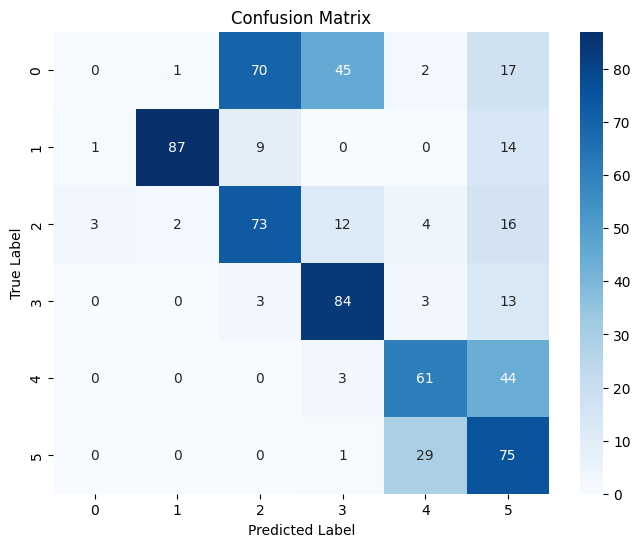

In [175]:
print("\nClassification Report:")
print(classification_report(y_val_BMI, y_pred))

print("Training set evaluation:")
evaluate_model(y_val_BMI, y_pred)

#### Visualize the Decision Tree, show clearly class number, gini value etc.  (10 points)


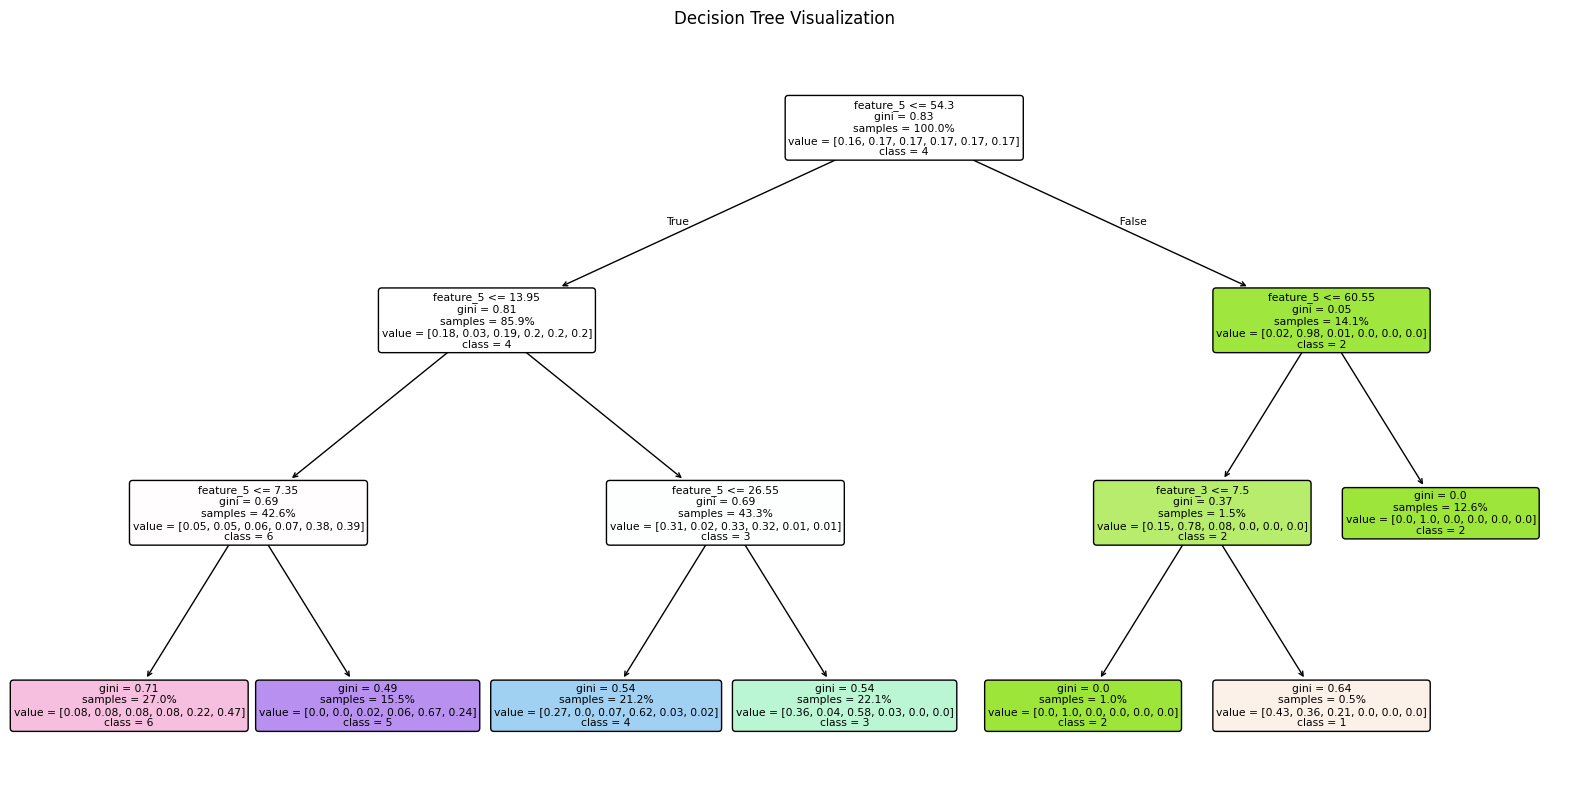

In [176]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

plt.figure(figsize=(20,10))

# Plotting the tree
plot_tree(dt_classifier,
          feature_names=[f'feature_{i}' for i in range(X_train_BMI.shape[1])],  # names
          class_names=[str(i) for i in dt_classifier.classes_],  # Converting class numbers to strings
          filled=True,  # Filling color based on majority class
          rounded=True,  # Rounding edges of boxes
          proportion=True,  # Showing proportions instead of counts
          precision=2,     # Precision of decimal numbers
          impurity=True)   # Showing gini at each node

plt.title("Decision Tree Visualization")
plt.show()

### Explain briefly the question. What is the role of gini in decision tree? (10 points)

Gini plays an important role in decision trees by helping the model figure out the best way to split the data at each step. Gini measures how "mixed up" the data is in terms of class labels.

If all the data points in a group belong to the same class, the Gini value is 0 (perfectly pure). But if the group has a mix of different classes, the Gini value gets higher. The decision tree uses this score to decide which split will make the groups as "pure" as possible.

So, at every split, the tree looks for the option that reduces the Gini value the most. It’s basically a way to ensure the tree makes better decisions by creating groups where the data is as uniform as possible. This helps the model make more accurate predictions.